# Домашнее задание:
Решение ML-задачи Kaggle. DLS Осень 2022

Параева Елена

Stepik User ID: 508947197

Kaggle ник Elena_Paraeva

Kaggle best score 0.73275

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

# Все признаки
feature_cols = num_cols + cat_cols
# Таргет
target_col = 'Churn'

In [5]:
# Размерность датасета
data.shape

(5282, 20)

In [6]:
# Кол-во пустых значений в столбцах в процентах
nans = pd.DataFrame(data.isna().count()*100//data.shape[0], columns = ['Кол-во пустых значений'])
nans['Кол-во пустых значений'] = data.shape[0] - nans['Кол-во пустых значений']
nans

,Кол-во пустых значений
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных признаков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном графике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

1. Анализ численных признаков

In [8]:
data['TotalSpent'].describe()
# >> Вывод - данные не представлены в числовом виде`

count     5282
unique    4978
top           
freq         9
Name: TotalSpent, dtype: object

In [9]:
# Индексы пропусков значений в TotalSpent
idx = data["TotalSpent"][data["TotalSpent"] == ' ']
idx = idx.index.values

In [10]:
# Пропуск в колонке
data["TotalSpent"].loc[idx[1]]

' '

In [11]:
# Заполним нулем
for i in idx:
    data["TotalSpent"].loc[i] = 0

In [12]:
data["TotalSpent"] = pd.to_numeric(data["TotalSpent"])

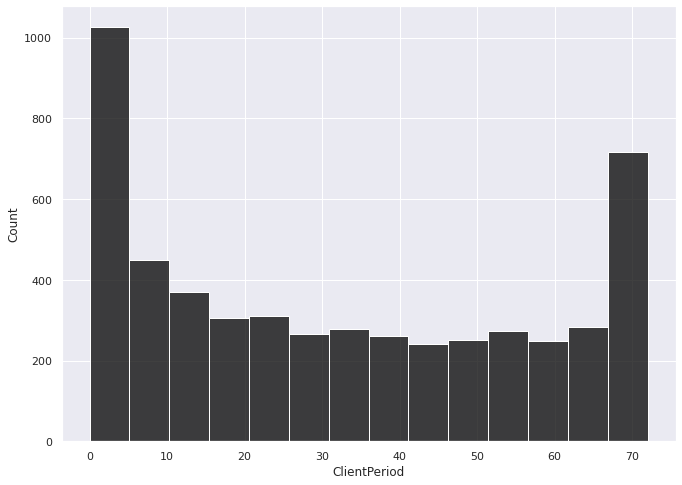

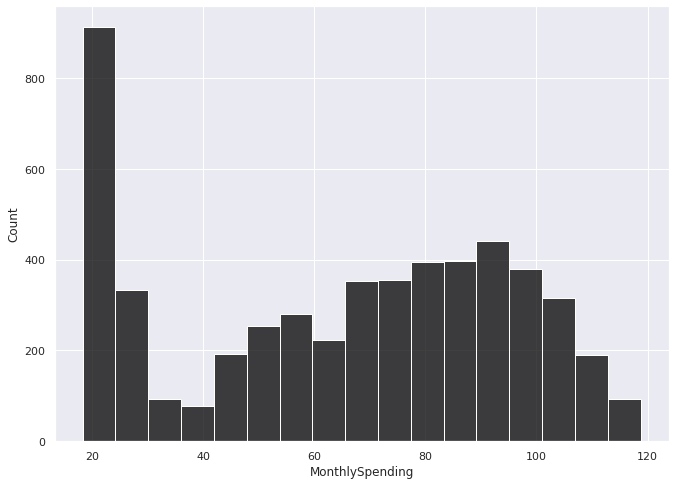

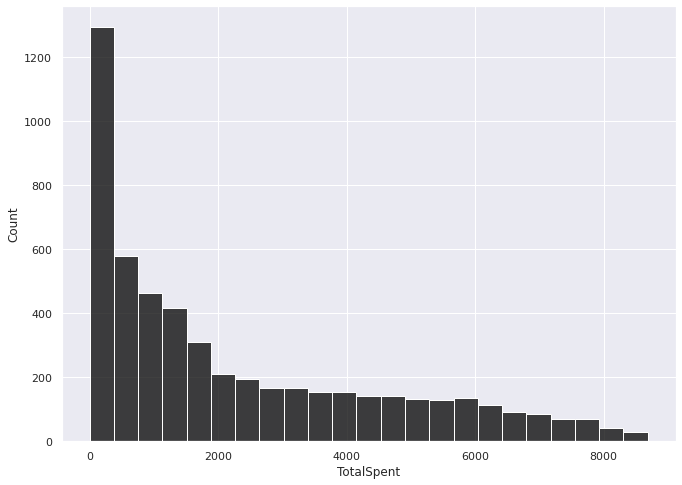

In [13]:
# Гистограммы численных признаков
sns.set(rc={'figure.figsize':(11,8)})
for i in num_cols:
    sns.histplot(data[i], color='black');
    plt.show();

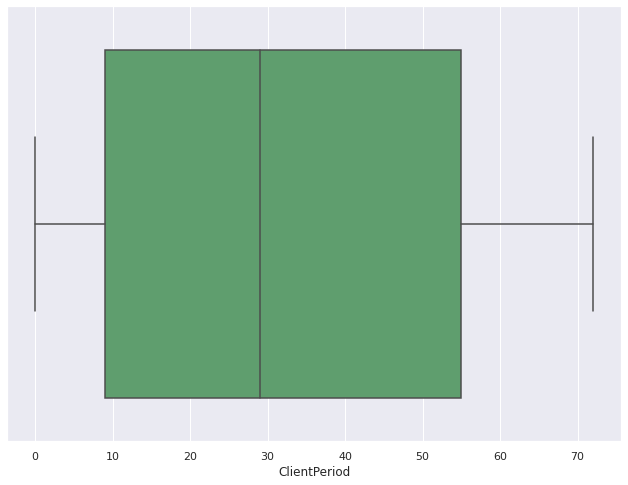

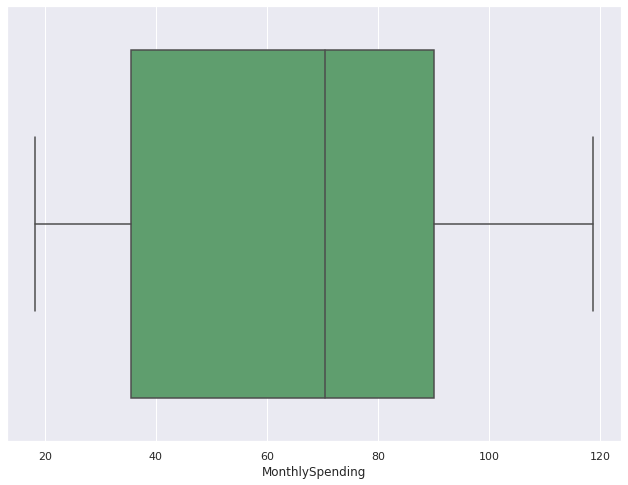

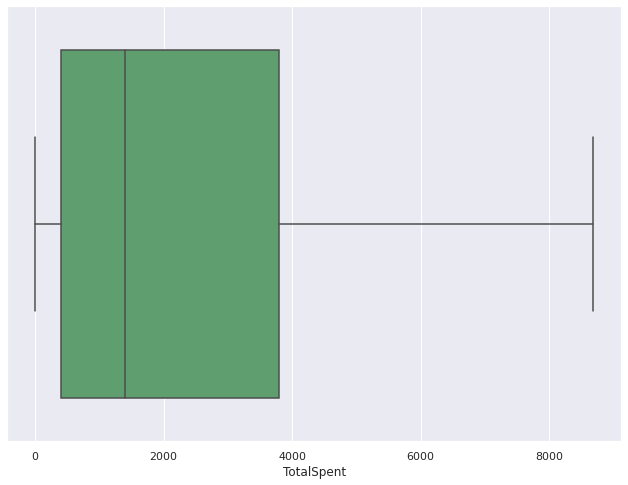

In [14]:
# Ящики с усами для численных признаков
for i in num_cols:
    sns.boxplot(data[i], color = 'g');
    plt.show();

2. Анализ категориальных признаков

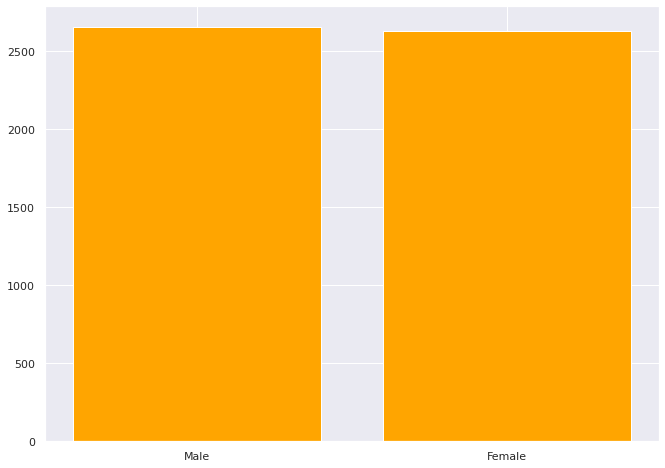

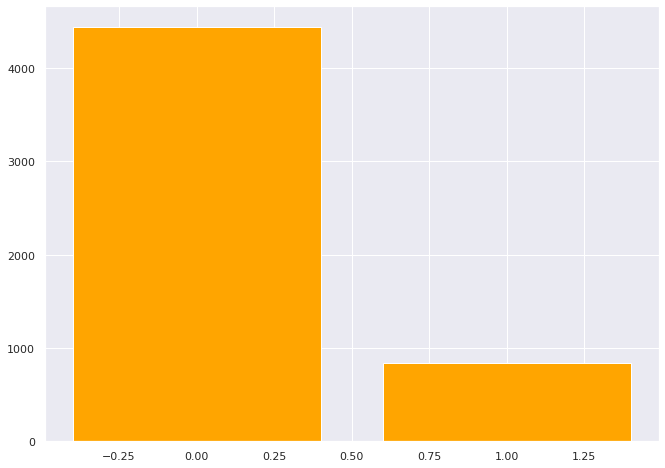

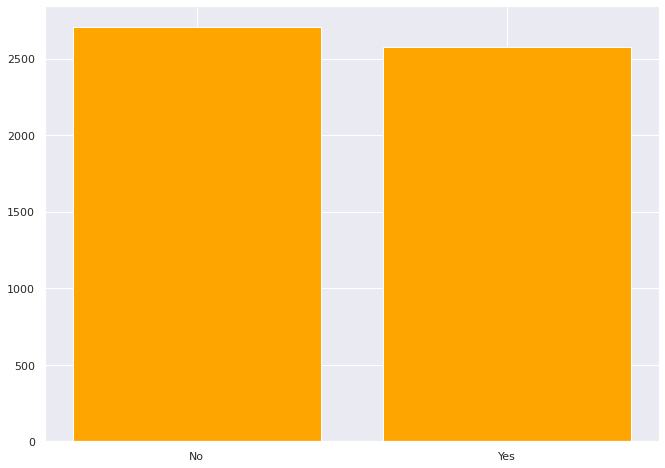

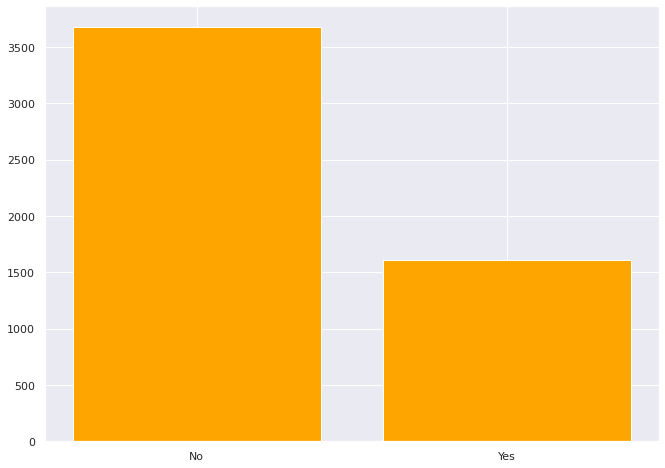

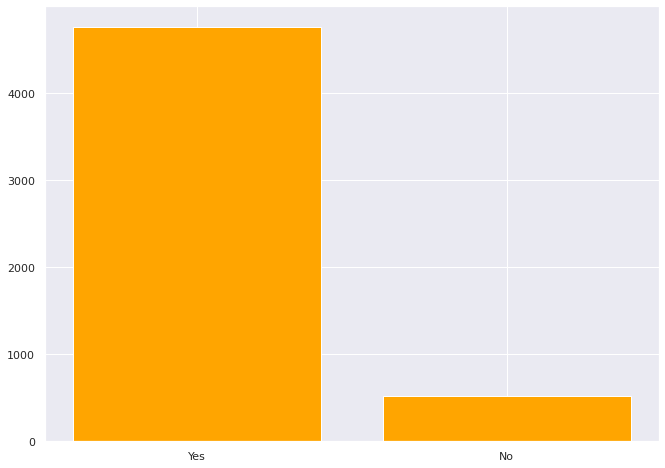

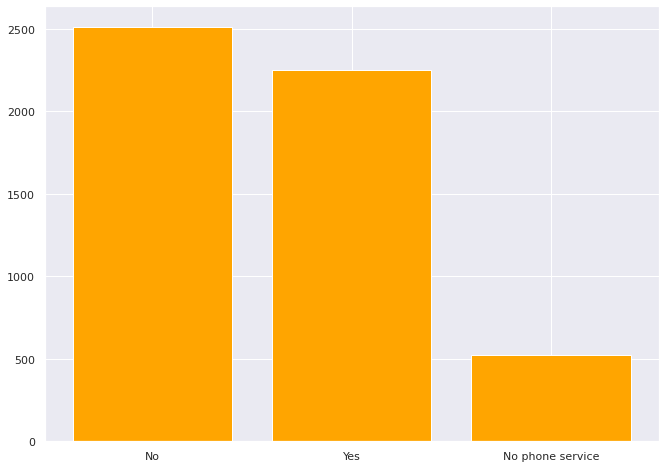

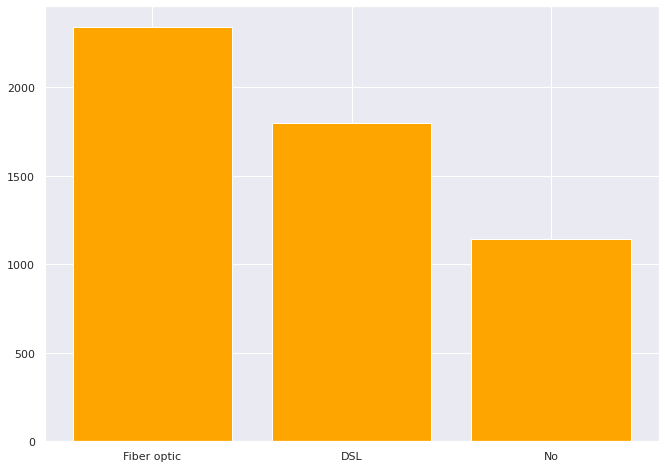

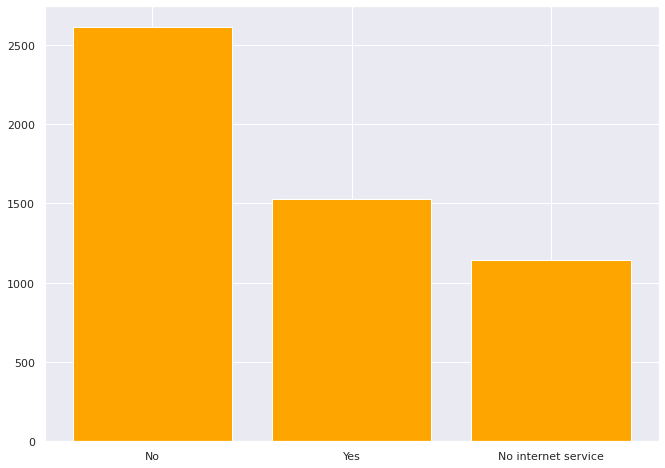

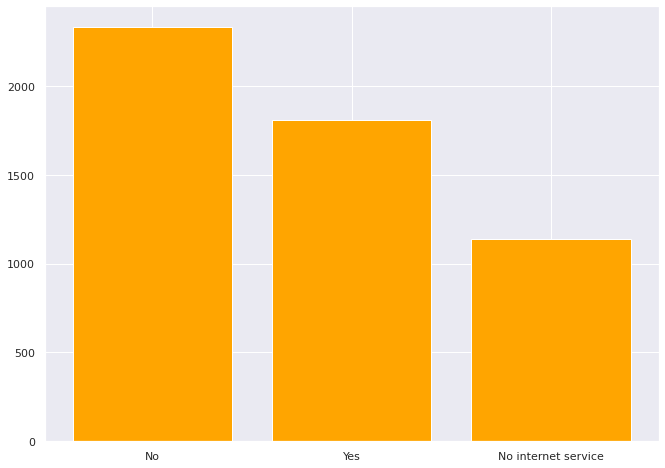

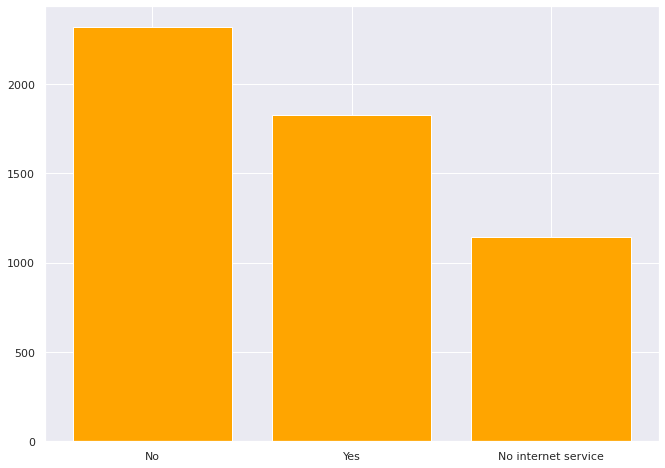

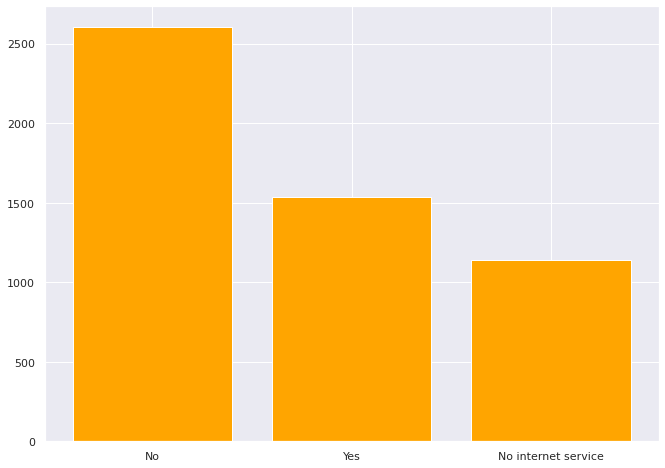

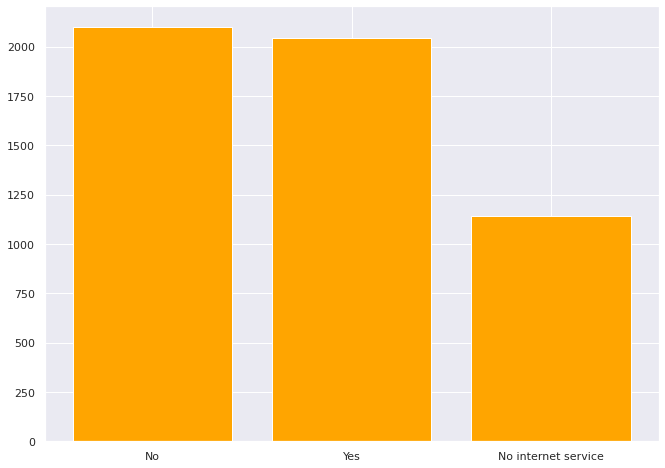

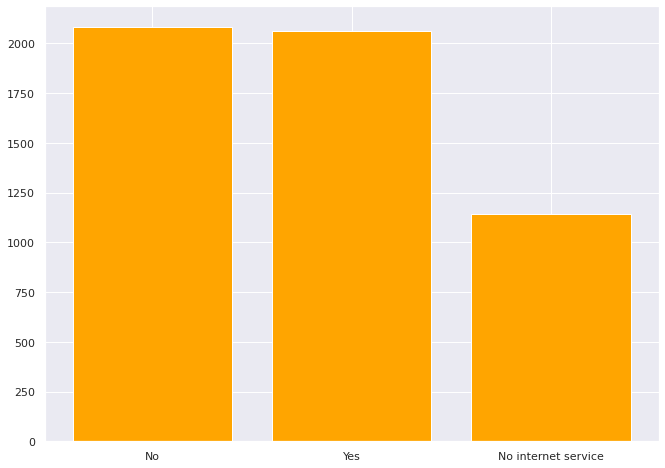

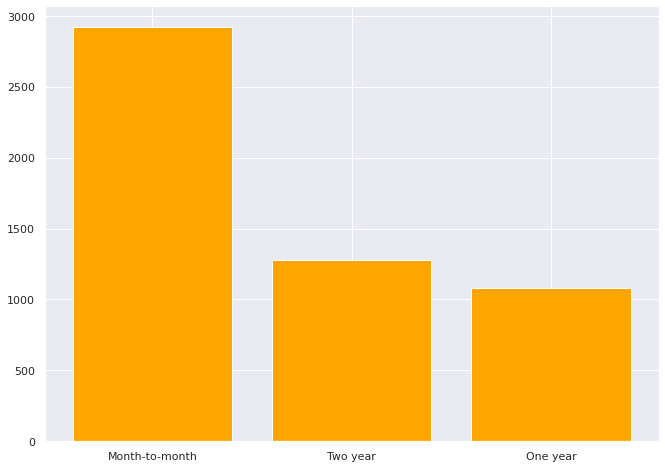

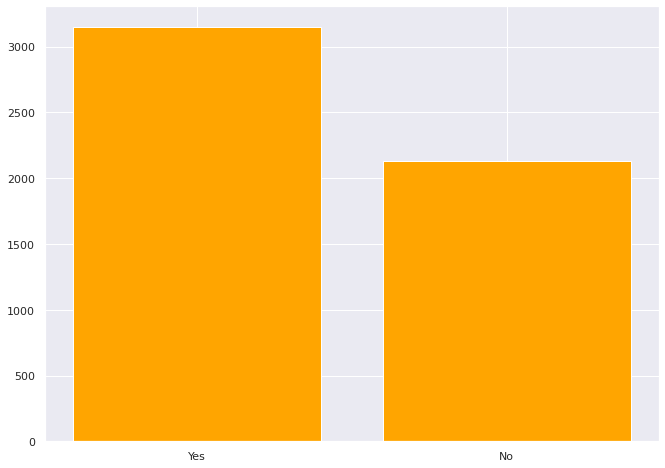

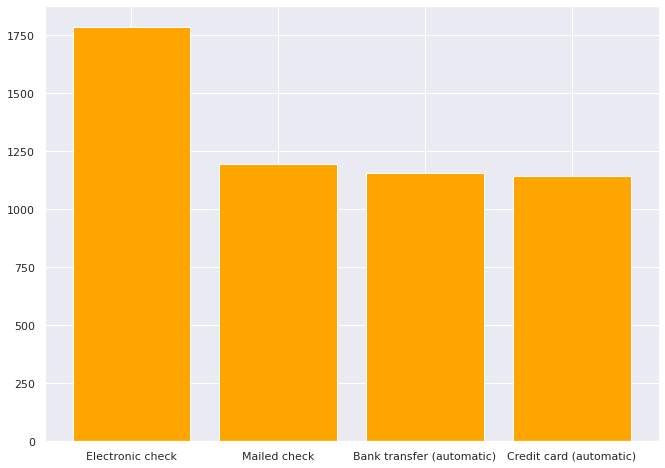

In [15]:
for i in cat_cols:
    plt.bar(data[i].value_counts().index.values, data[i].value_counts().values, color = 'orange')
    plt.show();

3. Распределение целевой переменной

In [16]:
y = data[target_col]
y

0       0
1       0
2       1
3       0
4       0
       ..
5277    0
5278    0
5279    0
5280    0
5281    0
Name: Churn, Length: 5282, dtype: int64

In [17]:
y.value_counts(normalize=True)

0    0.737978
1    0.262022
Name: Churn, dtype: float64

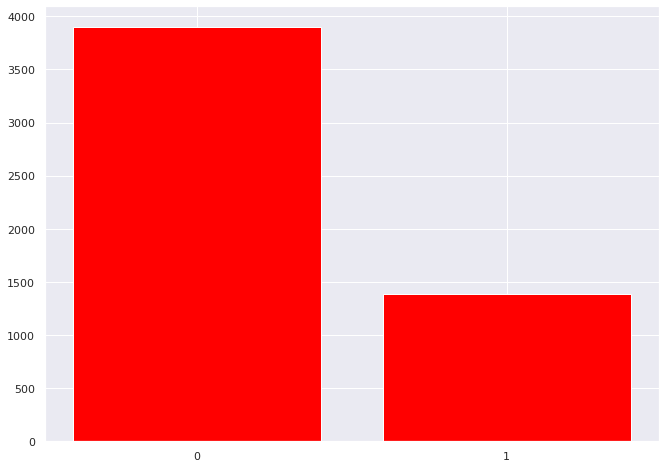

In [18]:
plt.bar(['0','1'], y.value_counts().values, color = 'red');

! Вывод - задача не сбалансирована

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

#### Оценка IV важности каждого признака

In [19]:
max_bin = 7
force_bin = 3

def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = np.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [21]:
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import warnings

warnings.warn('my warning')
final_iv, IV = data_vars(data.drop(columns = 'Churn'), data[target_col])

In [22]:
IV.sort_values(by='IV',ascending=False)

,VAR_NAME,IV
2,HasContractPhone,1.264242
0,ClientPeriod,0.775298
8,HasOnlineSecurityService,0.760764
12,HasTechSupportAccess,0.706738
4,HasInternetService,0.604117
7,HasOnlineBackup,0.541285
3,HasDeviceProtection,0.507224
16,PaymentMethod,0.449562
5,HasMovieSubscription,0.388658
9,HasOnlineTV,0.384598


In [23]:
useless_columns = ['HasMultiplePhoneNumbers', 'HasPhoneService', 'Sex']

#### Посмотрим на матрицу корреляции фичей

In [26]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


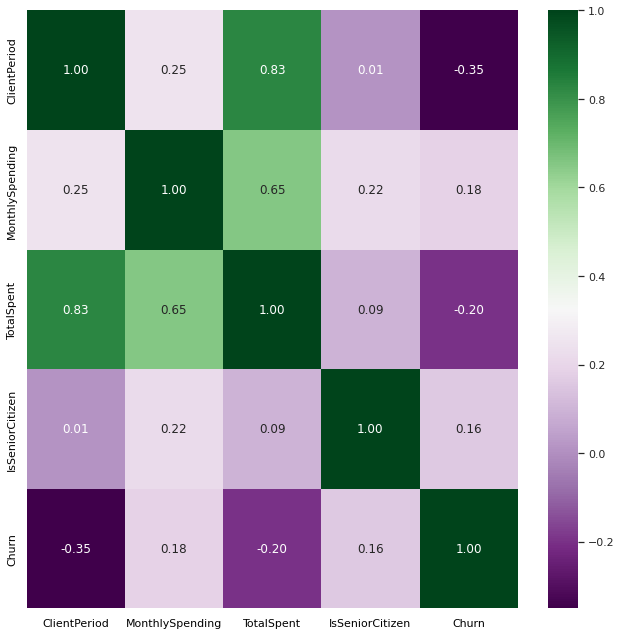

In [27]:
fig, ax = plt.subplots(figsize=(11, 11))

sns.heatmap(ax=ax, 
            data=data.corr(), 
            annot = True, 
            cmap='PRGn', 
            fmt=".2f"
            )
plt.tick_params(colors = 'black')
plt.show();

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

1. Предобработка для LogisticRegression

In [29]:
# Данные без предобработки
Data = data.copy()

In [30]:
# Стандартизация числовых признаков
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [35]:
# удаление столбцов
data_del = data.drop(useless_columns, axis=1)
cat_cols2 = [i for i in cat_cols if i not in useless_columns]
# data, cat_cols == без удаления

In [34]:
# OneHotEnc для категориальных признаков
data.shape, data[cat_cols].shape, data_del.shape

((5282, 20), (5282, 16), (5282, 17))

In [37]:
data_dummies = pd.get_dummies(data_del, columns=cat_cols2, dummy_na=True, drop_first=True)
# data_dummies = pd.get_dummies(data, columns=cat_cols, dummy_na=True, drop_first=True)

In [38]:
data_dummies.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Churn,IsSeniorCitizen_1.0,IsSeniorCitizen_nan,HasPartner_Yes,HasPartner_nan,HasChild_Yes,HasChild_nan,...,HasMovieSubscription_nan,HasContractPhone_One year,HasContractPhone_Two year,HasContractPhone_nan,IsBillingPaperless_Yes,IsBillingPaperless_nan,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_nan
0,0.920767,-1.505447,-0.555852,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,1.613288,-1.294998,-0.183039,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,-1.279005,0.363737,-0.974768,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,-0.016173,0.476418,0.124519,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.124450,1.667856,1.970599,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
5,-0.301328,-1.495504,-0.798774,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6,-0.219855,0.836004,0.059905,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-1.279005,-0.637138,-0.988078,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0.717084,1.359640,1.346204,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,1.613288,-0.123444,0.926804,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [41]:
# X and y с предобработкой
y = data_dummies['Churn']
X = data_dummies.drop(['Churn'], axis = 1)

In [42]:
# Разделение на train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    random_state=42)

2. LogisticRegressionСV

In [43]:
# Логистическая регрессия CV
cs = (100, 10, 1, 0.1, 0.01, 0.001)
lr_cv = LogisticRegressionCV(Cs=cs, scoring='roc_auc', refit=True)

In [44]:
lr_cv.fit(X_train, y_train)

LogisticRegressionCV(scoring='roc_auc')

In [116]:
lr_cv.C_

array([2.7825594])

In [45]:
lr_preds = lr_cv.predict(X_train)
lr_preds_proba = lr_cv.predict_proba(X_train)[:, 1]
# Метрика на трейне
print('roc_auc', roc_auc_score(y_train, lr_preds_proba))

roc_auc 0.8520399673702622


In [46]:
lr_preds = lr_cv.predict(X_valid)
lr_preds_proba = lr_cv.predict_proba(X_valid)[:, 1]
# Метрика на валидации
print('roc_auc', roc_auc_score(y_valid, lr_preds_proba))

roc_auc 0.8277583324867707


In [47]:
# Таблица сопряженности
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_valid, lr_preds))

,0,1
0,687,92
1,147,131


3. Поиск наилучших гиперпараметров и кросс-валидация

In [48]:
# Кросс-валидация. Поиск оптимального гиперпараметра С
from sklearn.model_selection import cross_val_score
print('C = 100')
cross_val_scores = cross_val_score(LogisticRegression(C = 100), X, y, cv=5, scoring='roc_auc')
print(cross_val_scores)
print(np.mean(cross_val_scores))

print('C = 10')
cross_val_scores = cross_val_score(LogisticRegression(C = 10), X, y, cv=5, scoring='roc_auc')
print(cross_val_scores)
print(np.mean(cross_val_scores))

print('C = 1')
cross_val_scores = cross_val_score(LogisticRegression(C = 1), X, y, cv=5, scoring='roc_auc')
print(cross_val_scores)
print(np.mean(cross_val_scores))

print('C = 0.1')
cross_val_scores = cross_val_score(LogisticRegression(C = 0.1), X, y, cv=5, scoring='roc_auc')
print(cross_val_scores)
print(np.mean(cross_val_scores))

print('C = 0.01')
cross_val_scores = cross_val_score(LogisticRegression(C = 0.01), X, y, cv=5, scoring='roc_auc')
print(cross_val_scores)
print(np.mean(cross_val_scores))

print('C = 0.001')
cross_val_scores = cross_val_score(LogisticRegression(C = 0.001), X, y, cv=5, scoring='roc_auc')
print(cross_val_scores)
print(np.mean(cross_val_scores))

C = 100
[0.85983986 0.83543692 0.8343181  0.85596641 0.83353415]
0.8438190870794328
C = 10
[0.85984912 0.83548783 0.83432274 0.85597104 0.83350171]
0.8438264886540011
C = 1
[0.85964084 0.83541377 0.83419268 0.85602202 0.8334461 ]
0.8437430833656808
C = 0.1
[0.85775248 0.83326159 0.83354701 0.8554381  0.83209289]
0.8424184140992231
C = 0.01
[0.85235583 0.8281519  0.83291992 0.84888986 0.82792667]
0.838048834317673
C = 0.001
[0.84490419 0.82376886 0.8326505  0.8385554  0.82249065]
0.832473921269464


Вывод
С = 10

In [50]:
lr = LogisticRegression(penalty='l2', # наличие регуляризации и её вид
dual=False, # двоичная/первичная формулировка(имеет смысл при l2 и liblinear, объекты<признаки
tol=0.0001, # критерий остановки
C=100, # относит. сила регуляризации (default=1). Чем меньше, тем больше регуляризация
fit_intercept=True, # следует ли добавлять смещение bias
intercept_scaling=1, # для liblinear & fit_int=True, масштаб bias
class_weight=None, # веса, относящиеся к каждому классу(default=None)
random_state=None, # какой генератор псевдослуч чисел использовать
solver='lbfgs', # алгоритм оптимизации(решатель для подбора модели)
max_iter=100, # количество итераций при подгонке модели
multi_class='auto', # подход к использованию нескольких классов
verbose=0, # степень детализации при liblinear и lbfgs
warm_start=False, # следует ли повторно использовать ранее полученное решение
n_jobs=-1, # использование ядер. При (-1) использует все доступные ядра
l1_ratio=None # плавающее число точек от нуля до единицы, либо None (по умолчанию). 
# Оно определяет относительную важность части L1 в регуляризации elastic-net.
)

In [51]:
lr.fit(X_train, y_train)

LogisticRegression(C=100, n_jobs=-1)

In [53]:
lr_preds = lr.predict(X_train)
lr_preds_proba = lr.predict_proba(X_train)[:, 1]
# Метрика на трейне
print('roc_auc', roc_auc_score(y_train, lr_preds_proba))

lr_preds = lr.predict(X_valid)
lr_preds_proba = lr.predict_proba(X_valid)[:, 1]
# Метрика на валидации
print('roc_auc', roc_auc_score(y_valid, lr_preds_proba))

roc_auc 0.8521472257475764
roc_auc 0.8278506847923459


In [54]:
# Поиск по сетке
param_grid = {
    "penalty": ['l2', 'l1'], # норма штрафа
    "tol": [0.0001, 0.00005, 0.0005], # критерий остановки
    "C": [100, 50, 25, 10], # обратная сила регуляризации
    "fit_intercept": [True], # следует ли добавлять константу
    "class_weight": [None], # веса
    "solver": ['liblinear'], # алгоритм оптимизации
    "max_iter": [100, 150, 50], # количество итераций
    "warm_start": [True, False], # использование решения предыдущего шага
    'multi_class': ['auto'] # бинарная классификация
}

In [55]:
from sklearn.model_selection import KFold

lr =  LogisticRegression() # новый необученный объект модели
kfold = KFold(n_splits=5, shuffle=True, random_state=42) # пять фолдов с валидацией и перемешиванием

In [56]:
CV_lr = GridSearchCV(estimator=lr, 
                     param_grid=param_grid, 
                     scoring='roc_auc',
                     cv=kfold, 
                     verbose = 1000) # verbose - будем печатать вывод полностью

In [57]:
CV_lr.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True
[CV 1/5; 1/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True;, score=0.868 total time=   0.0s
[CV 2/5; 1/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True
[CV 2/5; 1/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 1/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True
[CV 3/5; 1/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi

[CV 1/5; 7/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.868 total time=   0.0s
[CV 2/5; 7/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 2/5; 7/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 7/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 3/5; 7/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.847 total time=   0.0s
[CV 4/5; 7/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solve

[CV 4/5; 13/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 13/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True
[CV 5/5; 13/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 14/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=False
[CV 1/5; 14/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=False;, score=0.868 total time=   0.0s
[CV 2/5; 14/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l

[CV 2/5; 19/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 19/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 3/5; 19/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.847 total time=   0.0s
[CV 4/5; 19/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 4/5; 19/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 19/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1,

[CV 2/5; 24/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.848 total time=   0.0s
[CV 3/5; 24/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 3/5; 24/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.847 total time=   0.0s
[CV 4/5; 24/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 4/5; 24/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 24/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalt

[CV 5/5; 29/144] END C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 30/144] START C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False
[CV 1/5; 30/144] END C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False;, score=0.868 total time=   0.0s
[CV 2/5; 30/144] START C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False
[CV 2/5; 30/144] END C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False;, score=0.848 total time=   0.0s
[CV 3/5; 30/144] START C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, s

[CV 4/5; 35/144] END C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 35/144] START C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True
[CV 5/5; 35/144] END C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 36/144] START C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 1/5; 36/144] END C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.868 total time=   0.0s
[CV 2/5; 36/144] START C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, sol

[CV 4/5; 40/144] END C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 40/144] START C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False
[CV 5/5; 40/144] END C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 41/144] START C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True
[CV 1/5; 41/144] END C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.868 total time=   0.0s
[CV 2/5; 41/144] START C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solve

[CV 3/5; 45/144] END C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.847 total time=   0.0s
[CV 4/5; 45/144] START C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True
[CV 4/5; 45/144] END C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 45/144] START C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True
[CV 5/5; 45/144] END C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 46/144] START C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=lib

[CV 1/5; 53/144] END C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.868 total time=   0.0s
[CV 2/5; 53/144] START C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True
[CV 2/5; 53/144] END C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 53/144] START C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True
[CV 3/5; 53/144] END C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.847 total time=   0.0s
[CV 4/5; 53/144] START C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solve

[CV 3/5; 58/144] END C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.847 total time=   0.1s
[CV 4/5; 58/144] START C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False
[CV 4/5; 58/144] END C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 58/144] START C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False
[CV 5/5; 58/144] END C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 59/144] START C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solve

[CV 5/5; 64/144] END C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 65/144] START C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True
[CV 1/5; 65/144] END C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.868 total time=   0.0s
[CV 2/5; 65/144] START C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True
[CV 2/5; 65/144] END C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 65/144] START C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=libl

[CV 4/5; 69/144] END C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 69/144] START C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True
[CV 5/5; 69/144] END C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 70/144] START C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False
[CV 1/5; 70/144] END C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.868 total time=   0.0s
[CV 2/5; 70/144] START C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=libline

[CV 4/5; 75/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 75/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=True
[CV 5/5; 75/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 76/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False
[CV 1/5; 76/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.868 total time=   0.0s
[CV 2/5; 76/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=l

[CV 3/5; 81/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.847 total time=   0.0s
[CV 4/5; 81/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True
[CV 4/5; 81/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 81/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True
[CV 5/5; 81/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 82/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=lib

[CV 5/5; 87/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 88/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False
[CV 1/5; 88/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.868 total time=   0.0s
[CV 2/5; 88/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False
[CV 2/5; 88/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.848 total time=   0.0s
[CV 3/5; 88/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver

[CV 3/5; 93/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.847 total time=   0.0s
[CV 4/5; 93/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True
[CV 4/5; 93/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.822 total time=   0.1s
[CV 5/5; 93/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True
[CV 5/5; 93/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 94/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=lib

[CV 4/5; 98/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 98/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=False
[CV 5/5; 98/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 99/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=True
[CV 1/5; 99/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=True;, score=0.868 total time=   0.0s
[CV 2/5; 99/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=lib

[CV 5/5; 103/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 104/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False
[CV 1/5; 104/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False;, score=0.868 total time=   0.0s
[CV 2/5; 104/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False
[CV 2/5; 104/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False;, score=0.848 total time=   0.0s
[CV 3/5; 104/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, s

[CV 4/5; 108/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 108/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 5/5; 108/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 109/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True
[CV 1/5; 109/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True;, score=0.868 total time=   0.0s
[CV 2/5; 109/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2,

[CV 5/5; 114/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 115/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 1/5; 115/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.868 total time=   0.0s
[CV 2/5; 115/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 2/5; 115/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 115/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1

[CV 4/5; 119/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 119/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True
[CV 5/5; 119/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 120/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 1/5; 120/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.868 total time=   0.0s
[CV 2/5; 120/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l

[CV 2/5; 125/144] END C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 125/144] START C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True
[CV 3/5; 125/144] END C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.847 total time=   0.0s
[CV 4/5; 125/144] START C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True
[CV 4/5; 125/144] END C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 125/144] START C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2,

[CV 3/5; 130/144] END C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.847 total time=   0.0s
[CV 4/5; 130/144] START C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False
[CV 4/5; 130/144] END C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 130/144] START C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False
[CV 5/5; 130/144] END C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 131/144] START C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1,

[CV 1/5; 137/144] END C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.868 total time=   0.0s
[CV 2/5; 137/144] START C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True
[CV 2/5; 137/144] END C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 137/144] START C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True
[CV 3/5; 137/144] END C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.847 total time=   0.0s
[CV 4/5; 137/144] START C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solve

[CV 4/5; 142/144] END C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 142/144] START C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False
[CV 5/5; 142/144] END C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 143/144] START C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True
[CV 1/5; 143/144] END C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.868 total time=   0.0s
[CV 2/5; 143/144] START C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solve

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 50, 25, 10], 'class_weight': [None],
                         'fit_intercept': [True], 'max_iter': [100, 150, 50],
                         'multi_class': ['auto'], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear'],
                         'tol': [0.0001, 5e-05, 0.0005],
                         'warm_start': [True, False]},
             scoring='roc_auc', verbose=1000)

In [58]:
CV_lr.best_score_, CV_lr.best_params_ 

(0.8473765990519926,
 {'C': 25,
  'class_weight': None,
  'fit_intercept': True,
  'max_iter': 100,
  'multi_class': 'auto',
  'penalty': 'l1',
  'solver': 'liblinear',
  'tol': 0.0001,
  'warm_start': True})

In [59]:
CV_lr.best_estimator_

LogisticRegression(C=25, penalty='l1', solver='liblinear', warm_start=True)

In [60]:
lr_preds = CV_lr.predict(X_valid)
lr_preds_proba = CV_lr.predict_proba(X_valid)[:, 1]

# Метрика на валидации
print('roc_auc', roc_auc_score(y_valid, lr_preds_proba))

roc_auc 0.8278368319465095


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

>> Лучшее качество roc_auc 0.8278368319465095

>> Модель CV_lr = LogisticRegression(C=25, penalty='l1', solver='liblinear', warm_start=True)


#### Используем Permutation Importance для определения важности признаков

In [61]:
import eli5
from eli5.sklearn import PermutationImportance

perm=PermutationImportance(CV_lr, random_state=42).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names=X_valid.columns.tolist())

Weight,Feature
0.1956 ± 0.0142,ClientPeriod
0.0358 ± 0.0229,HasContractPhone_Two year
0.0335 ± 0.0142,TotalSpent
0.0182 ± 0.0106,HasInternetService_Fiber optic
0.0141 ± 0.0052,HasOnlineTV_No internet service
0.0101 ± 0.0036,MonthlySpending
0.0082 ± 0.0104,HasContractPhone_One year
0.0062 ± 0.0047,HasOnlineSecurityService_Yes
0.0040 ± 0.0048,IsBillingPaperless_Yes
0.0031 ± 0.0033,PaymentMethod_Electronic check


In [62]:
feature_weights = eli5.explain_weights_df(perm, feature_names=X_valid.columns.tolist())

In [63]:
useless_columns2 = feature_weights[feature_weights['weight'] < 0.0001]['feature'].tolist()

In [64]:
# Ненужные признаки
print(*useless_columns2, sep=', ')
len(useless_columns2)

PaymentMethod_Mailed check, HasDeviceProtection_nan, IsBillingPaperless_nan, HasContractPhone_nan, IsSeniorCitizen_nan, HasPartner_nan, HasMovieSubscription_nan, HasChild_nan, HasMovieSubscription_No internet service, HasInternetService_No, HasInternetService_nan, HasOnlineSecurityService_No internet service, HasOnlineTV_nan, HasOnlineSecurityService_nan, HasOnlineBackup_No internet service, HasTechSupportAccess_nan, HasOnlineBackup_nan, HasTechSupportAccess_No internet service, PaymentMethod_nan, HasPartner_Yes, PaymentMethod_Credit card (automatic)


21

Обучение модели

In [65]:
model = CV_lr

In [66]:
model.fit(X_train.drop(columns = useless_columns2), y_train)
# model.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True
[CV 1/5; 1/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True;, score=0.869 total time=   0.0s
[CV 2/5; 1/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True
[CV 2/5; 1/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 1/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True
[CV 3/5; 1/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi

[CV 2/5; 7/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 7/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 3/5; 7/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 4/5; 7/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 4/5; 7/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 7/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solve

[CV 2/5; 12/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.848 total time=   0.0s
[CV 3/5; 12/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 3/5; 12/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.848 total time=   0.0s
[CV 4/5; 12/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 4/5; 12/144] END C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 12/144] START C=100, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalt

[CV 4/5; 18/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 18/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False
[CV 5/5; 18/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 19/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 1/5; 19/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.869 total time=   0.0s
[CV 2/5; 19/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=

[CV 5/5; 23/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 24/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 1/5; 24/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.869 total time=   0.0s
[CV 2/5; 24/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 2/5; 24/144] END C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.848 total time=   0.0s
[CV 3/5; 24/144] START C=100, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty

[CV 1/5; 30/144] END C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False;, score=0.869 total time=   0.0s
[CV 2/5; 30/144] START C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False
[CV 2/5; 30/144] END C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False;, score=0.848 total time=   0.0s
[CV 3/5; 30/144] START C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False
[CV 3/5; 30/144] END C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False;, score=0.848 total time=   0.0s
[CV 4/5; 30/144] START C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, 

[CV 4/5; 35/144] END C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 35/144] START C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True
[CV 5/5; 35/144] END C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 36/144] START C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 1/5; 36/144] END C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.869 total time=   0.0s
[CV 2/5; 36/144] START C=100, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, sol

[CV 4/5; 41/144] END C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 41/144] START C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True
[CV 5/5; 41/144] END C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 42/144] START C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False
[CV 1/5; 42/144] END C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False;, score=0.869 total time=   0.0s
[CV 2/5; 42/144] START C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, sol

[CV 4/5; 46/144] END C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 46/144] START C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False
[CV 5/5; 46/144] END C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 47/144] START C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True
[CV 1/5; 47/144] END C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.869 total time=   0.0s
[CV 2/5; 47/144] START C=50, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solve

[CV 4/5; 51/144] END C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 51/144] START C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=True
[CV 5/5; 51/144] END C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 52/144] START C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False
[CV 1/5; 52/144] END C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.869 total time=   0.0s
[CV 2/5; 52/144] START C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=l

[CV 3/5; 56/144] END C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False;, score=0.848 total time=   0.1s
[CV 4/5; 56/144] START C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False
[CV 4/5; 56/144] END C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 56/144] START C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False
[CV 5/5; 56/144] END C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 57/144] START C=50, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, 

[CV 2/5; 61/144] END C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 61/144] START C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True
[CV 3/5; 61/144] END C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True;, score=0.849 total time=   0.0s
[CV 4/5; 61/144] START C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True
[CV 4/5; 61/144] END C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 61/144] START C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=libl

[CV 3/5; 67/144] END C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 4/5; 67/144] START C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 4/5; 67/144] END C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 67/144] START C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 5/5; 67/144] END C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 68/144] START C=50, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=libl

[CV 4/5; 74/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 74/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=False
[CV 5/5; 74/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 75/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=True
[CV 1/5; 75/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=True;, score=0.869 total time=   0.0s
[CV 2/5; 75/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solv

[CV 5/5; 79/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 80/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False
[CV 1/5; 80/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False;, score=0.869 total time=   0.0s
[CV 2/5; 80/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False
[CV 2/5; 80/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=False;, score=0.848 total time=   0.0s
[CV 3/5; 80/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, s

[CV 4/5; 84/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 84/144] START C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 5/5; 84/144] END C=25, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 85/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True
[CV 1/5; 85/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0001, warm_start=True;, score=0.869 total time=   0.0s
[CV 2/5; 85/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, so

[CV 2/5; 91/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 91/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 3/5; 91/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 4/5; 91/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 4/5; 91/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 91/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solve

[CV 3/5; 96/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.848 total time=   0.0s
[CV 4/5; 96/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 4/5; 96/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 96/144] START C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 5/5; 96/144] END C=25, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 97/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, s

[CV 1/5; 103/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.869 total time=   0.0s
[CV 2/5; 103/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 2/5; 103/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 103/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True
[CV 3/5; 103/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0001, warm_start=True;, score=0.848 total time=   0.0s
[CV 4/5; 103/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solve

[CV 5/5; 107/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 108/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 1/5; 108/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.869 total time=   0.0s
[CV 2/5; 108/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False
[CV 2/5; 108/144] END C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=False;, score=0.848 total time=   0.0s
[CV 3/5; 108/144] START C=25, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, s

[CV 5/5; 113/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=True;, score=0.851 total time=   0.0s
[CV 1/5; 114/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False
[CV 1/5; 114/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False;, score=0.869 total time=   0.0s
[CV 2/5; 114/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False
[CV 2/5; 114/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear, tol=0.0005, warm_start=False;, score=0.848 total time=   0.0s
[CV 3/5; 114/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty

[CV 1/5; 119/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.869 total time=   0.0s
[CV 2/5; 119/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True
[CV 2/5; 119/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 119/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True
[CV 3/5; 119/144] END C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear, tol=0.0005, warm_start=True;, score=0.848 total time=   0.0s
[CV 4/5; 119/144] START C=10, class_weight=None, fit_intercept=True, max_iter=100, multi_class=auto, penalty=l1,

[CV 3/5; 124/144] END C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.848 total time=   0.0s
[CV 4/5; 124/144] START C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False
[CV 4/5; 124/144] END C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 124/144] START C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False
[CV 5/5; 124/144] END C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 125/144] START C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l2,

[CV 2/5; 129/144] END C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.848 total time=   0.0s
[CV 3/5; 129/144] START C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True
[CV 3/5; 129/144] END C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.848 total time=   0.0s
[CV 4/5; 129/144] START C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True
[CV 4/5; 129/144] END C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=True;, score=0.822 total time=   0.0s
[CV 5/5; 129/144] START C=10, class_weight=None, fit_intercept=True, max_iter=150, multi_class=auto, penalty=l1, solv

[CV 2/5; 136/144] END C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.848 total time=   0.0s
[CV 3/5; 136/144] START C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False
[CV 3/5; 136/144] END C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.848 total time=   0.0s
[CV 4/5; 136/144] START C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False
[CV 4/5; 136/144] END C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solver=liblinear, tol=5e-05, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 136/144] START C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l2, solve

[CV 3/5; 142/144] END C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.848 total time=   0.0s
[CV 4/5; 142/144] START C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False
[CV 4/5; 142/144] END C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.822 total time=   0.0s
[CV 5/5; 142/144] START C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False
[CV 5/5; 142/144] END C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solver=liblinear, tol=5e-05, warm_start=False;, score=0.851 total time=   0.0s
[CV 1/5; 143/144] START C=10, class_weight=None, fit_intercept=True, max_iter=50, multi_class=auto, penalty=l1, solve

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 50, 25, 10], 'class_weight': [None],
                         'fit_intercept': [True], 'max_iter': [100, 150, 50],
                         'multi_class': ['auto'], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear'],
                         'tol': [0.0001, 5e-05, 0.0005],
                         'warm_start': [True, False]},
             scoring='roc_auc', verbose=1000)

In [67]:
model.best_score_, model.best_params_, model.best_estimator_

(0.8476522253144714,
 {'C': 25,
  'class_weight': None,
  'fit_intercept': True,
  'max_iter': 100,
  'multi_class': 'auto',
  'penalty': 'l2',
  'solver': 'liblinear',
  'tol': 0.0005,
  'warm_start': True},
 LogisticRegression(C=25, solver='liblinear', tol=0.0005, warm_start=True))

In [68]:
model_preds = model.predict(X_valid.drop(columns = useless_columns2))
model_preds_proba = model.predict_proba(X_valid.drop(columns = useless_columns2))[:, 1]


# model_preds = model.predict(X_valid)
# model_preds_proba = model.predict_proba(X_valid)[:, 1]


# Метрика на валидации
print('roc_auc', roc_auc_score(y_valid, model_preds_proba))

roc_auc 0.8280584774798904


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные значения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [69]:
# Данные без предобработки
Data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.20,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.40,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.70,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.80,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [70]:
# Данные без предобработки категориальных признаков
# X and y
y = Data['Churn']
x = Data.drop(['Churn'], axis = 1)
# Удаление ненужных признаков
x = x.drop(columns=useless_columns)
# cat_cols2 использовать!

In [71]:
# Разделение на train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y, 
                                                      train_size=0.8,
                                                      random_state=42)

In [72]:
from catboost import CatBoostClassifier

1. Тест катбуста со стандартными параметрами

In [73]:
Cat1 = CatBoostClassifier()

In [75]:
Cat1.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True, cat_features=cat_cols2)

Learning rate set to 0.045236
0:	learn: 0.6602382	test: 0.6626104	best: 0.6626104 (0)	total: 52.6ms	remaining: 52.5s
1:	learn: 0.6348003	test: 0.6390478	best: 0.6390478 (1)	total: 55.4ms	remaining: 27.7s
2:	learn: 0.6137601	test: 0.6189550	best: 0.6189550 (2)	total: 58.8ms	remaining: 19.5s
3:	learn: 0.5921373	test: 0.5991261	best: 0.5991261 (3)	total: 63.9ms	remaining: 15.9s
4:	learn: 0.5721318	test: 0.5803683	best: 0.5803683 (4)	total: 68.3ms	remaining: 13.6s
5:	learn: 0.5569205	test: 0.5650167	best: 0.5650167 (5)	total: 71.2ms	remaining: 11.8s
6:	learn: 0.5402518	test: 0.5505746	best: 0.5505746 (6)	total: 76.4ms	remaining: 10.8s
7:	learn: 0.5262678	test: 0.5378086	best: 0.5378086 (7)	total: 81.3ms	remaining: 10.1s
8:	learn: 0.5152288	test: 0.5282317	best: 0.5282317 (8)	total: 85.5ms	remaining: 9.41s
9:	learn: 0.5055586	test: 0.5195423	best: 0.5195423 (9)	total: 88.3ms	remaining: 8.74s
10:	learn: 0.4959835	test: 0.5110741	best: 0.5110741 (10)	total: 91.5ms	remaining: 8.22s
11:	learn: 

140:	learn: 0.3791067	test: 0.4300389	best: 0.4299198 (132)	total: 584ms	remaining: 3.56s
141:	learn: 0.3787920	test: 0.4299673	best: 0.4299198 (132)	total: 589ms	remaining: 3.56s
142:	learn: 0.3787593	test: 0.4299536	best: 0.4299198 (132)	total: 593ms	remaining: 3.56s
143:	learn: 0.3785990	test: 0.4300150	best: 0.4299198 (132)	total: 597ms	remaining: 3.55s
144:	learn: 0.3783519	test: 0.4298891	best: 0.4298891 (144)	total: 601ms	remaining: 3.55s
145:	learn: 0.3780025	test: 0.4298799	best: 0.4298799 (145)	total: 606ms	remaining: 3.54s
146:	learn: 0.3779802	test: 0.4298453	best: 0.4298453 (146)	total: 610ms	remaining: 3.54s
147:	learn: 0.3779558	test: 0.4298216	best: 0.4298216 (147)	total: 613ms	remaining: 3.53s
148:	learn: 0.3778632	test: 0.4296954	best: 0.4296954 (148)	total: 619ms	remaining: 3.54s
149:	learn: 0.3775175	test: 0.4298312	best: 0.4296954 (148)	total: 623ms	remaining: 3.53s
150:	learn: 0.3770354	test: 0.4297330	best: 0.4296954 (148)	total: 627ms	remaining: 3.52s
151:	learn

273:	learn: 0.3498443	test: 0.4336558	best: 0.4291503 (193)	total: 1.17s	remaining: 3.09s
274:	learn: 0.3498042	test: 0.4336480	best: 0.4291503 (193)	total: 1.17s	remaining: 3.08s
275:	learn: 0.3495410	test: 0.4337870	best: 0.4291503 (193)	total: 1.17s	remaining: 3.08s
276:	learn: 0.3493085	test: 0.4338661	best: 0.4291503 (193)	total: 1.18s	remaining: 3.08s
277:	learn: 0.3491666	test: 0.4337739	best: 0.4291503 (193)	total: 1.18s	remaining: 3.07s
278:	learn: 0.3488010	test: 0.4338188	best: 0.4291503 (193)	total: 1.19s	remaining: 3.07s
279:	learn: 0.3484836	test: 0.4338690	best: 0.4291503 (193)	total: 1.19s	remaining: 3.07s
280:	learn: 0.3482424	test: 0.4341374	best: 0.4291503 (193)	total: 1.2s	remaining: 3.07s
281:	learn: 0.3481102	test: 0.4342567	best: 0.4291503 (193)	total: 1.2s	remaining: 3.06s
282:	learn: 0.3475687	test: 0.4344608	best: 0.4291503 (193)	total: 1.21s	remaining: 3.06s
283:	learn: 0.3474748	test: 0.4344845	best: 0.4291503 (193)	total: 1.21s	remaining: 3.06s
284:	learn: 

400:	learn: 0.3278296	test: 0.4393157	best: 0.4291503 (193)	total: 1.75s	remaining: 2.62s
401:	learn: 0.3277717	test: 0.4393149	best: 0.4291503 (193)	total: 1.76s	remaining: 2.62s
402:	learn: 0.3276746	test: 0.4393524	best: 0.4291503 (193)	total: 1.76s	remaining: 2.61s
403:	learn: 0.3275453	test: 0.4394521	best: 0.4291503 (193)	total: 1.77s	remaining: 2.61s
404:	learn: 0.3274015	test: 0.4394343	best: 0.4291503 (193)	total: 1.77s	remaining: 2.61s
405:	learn: 0.3273332	test: 0.4394515	best: 0.4291503 (193)	total: 1.78s	remaining: 2.6s
406:	learn: 0.3273310	test: 0.4394548	best: 0.4291503 (193)	total: 1.78s	remaining: 2.6s
407:	learn: 0.3271368	test: 0.4395285	best: 0.4291503 (193)	total: 1.79s	remaining: 2.6s
408:	learn: 0.3271350	test: 0.4395297	best: 0.4291503 (193)	total: 1.79s	remaining: 2.59s
409:	learn: 0.3271116	test: 0.4399933	best: 0.4291503 (193)	total: 1.8s	remaining: 2.59s
410:	learn: 0.3271054	test: 0.4399994	best: 0.4291503 (193)	total: 1.8s	remaining: 2.58s
411:	learn: 0.3

524:	learn: 0.3082878	test: 0.4423810	best: 0.4291503 (193)	total: 2.34s	remaining: 2.12s
525:	learn: 0.3081809	test: 0.4424984	best: 0.4291503 (193)	total: 2.35s	remaining: 2.12s
526:	learn: 0.3079296	test: 0.4424987	best: 0.4291503 (193)	total: 2.36s	remaining: 2.12s
527:	learn: 0.3077997	test: 0.4424156	best: 0.4291503 (193)	total: 2.36s	remaining: 2.11s
528:	learn: 0.3077842	test: 0.4424040	best: 0.4291503 (193)	total: 2.37s	remaining: 2.11s
529:	learn: 0.3076806	test: 0.4424591	best: 0.4291503 (193)	total: 2.37s	remaining: 2.1s
530:	learn: 0.3076165	test: 0.4424649	best: 0.4291503 (193)	total: 2.38s	remaining: 2.1s
531:	learn: 0.3075063	test: 0.4425015	best: 0.4291503 (193)	total: 2.38s	remaining: 2.1s
532:	learn: 0.3073382	test: 0.4425845	best: 0.4291503 (193)	total: 2.39s	remaining: 2.09s
533:	learn: 0.3069552	test: 0.4426673	best: 0.4291503 (193)	total: 2.39s	remaining: 2.09s
534:	learn: 0.3066884	test: 0.4426321	best: 0.4291503 (193)	total: 2.4s	remaining: 2.08s
535:	learn: 0.

643:	learn: 0.2904066	test: 0.4471254	best: 0.4291503 (193)	total: 2.93s	remaining: 1.62s
644:	learn: 0.2900730	test: 0.4471996	best: 0.4291503 (193)	total: 2.94s	remaining: 1.62s
645:	learn: 0.2898221	test: 0.4473687	best: 0.4291503 (193)	total: 2.94s	remaining: 1.61s
646:	learn: 0.2894898	test: 0.4472610	best: 0.4291503 (193)	total: 2.95s	remaining: 1.61s
647:	learn: 0.2893120	test: 0.4472236	best: 0.4291503 (193)	total: 2.95s	remaining: 1.6s
648:	learn: 0.2892461	test: 0.4472846	best: 0.4291503 (193)	total: 2.96s	remaining: 1.6s
649:	learn: 0.2889902	test: 0.4470426	best: 0.4291503 (193)	total: 2.96s	remaining: 1.59s
650:	learn: 0.2888041	test: 0.4470904	best: 0.4291503 (193)	total: 2.97s	remaining: 1.59s
651:	learn: 0.2887918	test: 0.4470855	best: 0.4291503 (193)	total: 2.98s	remaining: 1.59s
652:	learn: 0.2886311	test: 0.4470958	best: 0.4291503 (193)	total: 2.98s	remaining: 1.58s
653:	learn: 0.2883068	test: 0.4471999	best: 0.4291503 (193)	total: 2.98s	remaining: 1.58s
654:	learn: 

761:	learn: 0.2738120	test: 0.4498905	best: 0.4291503 (193)	total: 3.52s	remaining: 1.1s
762:	learn: 0.2737472	test: 0.4500310	best: 0.4291503 (193)	total: 3.53s	remaining: 1.09s
763:	learn: 0.2736714	test: 0.4500841	best: 0.4291503 (193)	total: 3.53s	remaining: 1.09s
764:	learn: 0.2736106	test: 0.4500741	best: 0.4291503 (193)	total: 3.53s	remaining: 1.08s
765:	learn: 0.2735151	test: 0.4501023	best: 0.4291503 (193)	total: 3.54s	remaining: 1.08s
766:	learn: 0.2734184	test: 0.4501485	best: 0.4291503 (193)	total: 3.54s	remaining: 1.08s
767:	learn: 0.2732902	test: 0.4504191	best: 0.4291503 (193)	total: 3.55s	remaining: 1.07s
768:	learn: 0.2732162	test: 0.4504791	best: 0.4291503 (193)	total: 3.56s	remaining: 1.07s
769:	learn: 0.2731320	test: 0.4504407	best: 0.4291503 (193)	total: 3.56s	remaining: 1.06s
770:	learn: 0.2730586	test: 0.4503727	best: 0.4291503 (193)	total: 3.57s	remaining: 1.06s
771:	learn: 0.2728513	test: 0.4505354	best: 0.4291503 (193)	total: 3.57s	remaining: 1.05s
772:	learn:

896:	learn: 0.2579039	test: 0.4533427	best: 0.4291503 (193)	total: 4.12s	remaining: 473ms
897:	learn: 0.2577886	test: 0.4534617	best: 0.4291503 (193)	total: 4.12s	remaining: 468ms
898:	learn: 0.2577221	test: 0.4534746	best: 0.4291503 (193)	total: 4.13s	remaining: 464ms
899:	learn: 0.2575673	test: 0.4535421	best: 0.4291503 (193)	total: 4.13s	remaining: 459ms
900:	learn: 0.2574291	test: 0.4534983	best: 0.4291503 (193)	total: 4.13s	remaining: 454ms
901:	learn: 0.2573641	test: 0.4534689	best: 0.4291503 (193)	total: 4.14s	remaining: 450ms
902:	learn: 0.2572601	test: 0.4535231	best: 0.4291503 (193)	total: 4.14s	remaining: 445ms
903:	learn: 0.2570592	test: 0.4534854	best: 0.4291503 (193)	total: 4.15s	remaining: 441ms
904:	learn: 0.2570075	test: 0.4534750	best: 0.4291503 (193)	total: 4.15s	remaining: 436ms
905:	learn: 0.2569580	test: 0.4534746	best: 0.4291503 (193)	total: 4.16s	remaining: 431ms
906:	learn: 0.2568327	test: 0.4533632	best: 0.4291503 (193)	total: 4.16s	remaining: 427ms
907:	learn

In [76]:
Cat_preds = Cat1.predict(X_train)
Cat_preds_proba = Cat1.predict_proba(X_train)[:, 1]

# Метрика на трейне
print('roc_auc', roc_auc_score(y_train, Cat_preds_proba))

roc_auc 0.8732226272272783


In [77]:
Cat_preds = Cat1.predict(X_valid)
Cat_preds_proba = Cat1.predict_proba(X_valid)[:, 1]

# Метрика на валидации
print('roc_auc', roc_auc_score(y_valid, Cat_preds_proba))

roc_auc 0.8298454945927725


2. Тест различных гиперпараметров

In [94]:
Cat2 = CatBoostClassifier(iterations=250, learning_rate=0.05)

In [95]:
Cat2.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True, cat_features=cat_cols2)

0:	learn: 0.6569390	test: 0.6595542	best: 0.6595542 (0)	total: 4.43ms	remaining: 1.1s
1:	learn: 0.6293426	test: 0.6340142	best: 0.6340142 (1)	total: 7.07ms	remaining: 877ms
2:	learn: 0.6037206	test: 0.6103924	best: 0.6103924 (2)	total: 11.9ms	remaining: 977ms
3:	learn: 0.5815129	test: 0.5914528	best: 0.5914528 (3)	total: 16.4ms	remaining: 1.01s
4:	learn: 0.5630378	test: 0.5739089	best: 0.5739089 (4)	total: 19.1ms	remaining: 938ms
5:	learn: 0.5452834	test: 0.5576421	best: 0.5576421 (5)	total: 22.9ms	remaining: 933ms
6:	learn: 0.5322932	test: 0.5454805	best: 0.5454805 (6)	total: 24.9ms	remaining: 865ms
7:	learn: 0.5190778	test: 0.5334887	best: 0.5334887 (7)	total: 29.6ms	remaining: 895ms
8:	learn: 0.5073352	test: 0.5218413	best: 0.5218413 (8)	total: 34.1ms	remaining: 913ms
9:	learn: 0.4983038	test: 0.5141522	best: 0.5141522 (9)	total: 39ms	remaining: 936ms
10:	learn: 0.4887431	test: 0.5057420	best: 0.5057420 (10)	total: 43.8ms	remaining: 951ms
11:	learn: 0.4814917	test: 0.4990538	best: 0

104:	learn: 0.3812319	test: 0.4298850	best: 0.4295930 (87)	total: 398ms	remaining: 550ms
105:	learn: 0.3807454	test: 0.4297747	best: 0.4295930 (87)	total: 403ms	remaining: 548ms
106:	learn: 0.3807265	test: 0.4297582	best: 0.4295930 (87)	total: 407ms	remaining: 543ms
107:	learn: 0.3806637	test: 0.4297558	best: 0.4295930 (87)	total: 410ms	remaining: 539ms
108:	learn: 0.3802551	test: 0.4296003	best: 0.4295930 (87)	total: 415ms	remaining: 537ms
109:	learn: 0.3801241	test: 0.4296052	best: 0.4295930 (87)	total: 420ms	remaining: 534ms
110:	learn: 0.3800984	test: 0.4295644	best: 0.4295644 (110)	total: 422ms	remaining: 528ms
111:	learn: 0.3797572	test: 0.4295781	best: 0.4295644 (110)	total: 425ms	remaining: 524ms
112:	learn: 0.3796346	test: 0.4295607	best: 0.4295607 (112)	total: 430ms	remaining: 521ms
113:	learn: 0.3794419	test: 0.4295471	best: 0.4295471 (113)	total: 435ms	remaining: 519ms
114:	learn: 0.3791002	test: 0.4295839	best: 0.4295471 (113)	total: 439ms	remaining: 515ms
115:	learn: 0.37

201:	learn: 0.3607020	test: 0.4298649	best: 0.4292348 (152)	total: 788ms	remaining: 187ms
202:	learn: 0.3605642	test: 0.4297824	best: 0.4292348 (152)	total: 794ms	remaining: 184ms
203:	learn: 0.3602522	test: 0.4299316	best: 0.4292348 (152)	total: 798ms	remaining: 180ms
204:	learn: 0.3599449	test: 0.4300087	best: 0.4292348 (152)	total: 802ms	remaining: 176ms
205:	learn: 0.3595495	test: 0.4300552	best: 0.4292348 (152)	total: 807ms	remaining: 172ms
206:	learn: 0.3595256	test: 0.4300471	best: 0.4292348 (152)	total: 811ms	remaining: 169ms
207:	learn: 0.3591806	test: 0.4301511	best: 0.4292348 (152)	total: 817ms	remaining: 165ms
208:	learn: 0.3587904	test: 0.4301246	best: 0.4292348 (152)	total: 822ms	remaining: 161ms
209:	learn: 0.3586273	test: 0.4301760	best: 0.4292348 (152)	total: 825ms	remaining: 157ms
210:	learn: 0.3582759	test: 0.4299960	best: 0.4292348 (152)	total: 830ms	remaining: 153ms
211:	learn: 0.3579199	test: 0.4298035	best: 0.4292348 (152)	total: 834ms	remaining: 150ms
212:	learn

In [96]:
Cat_preds = Cat2.predict(X_train)
Cat_preds_proba = Cat2.predict_proba(X_train)[:, 1]

# Метрика на трейне
print('roc_auc', roc_auc_score(y_train, Cat_preds_proba))

roc_auc 0.872090616515355


In [97]:
Cat_preds = Cat2.predict(X_valid)
Cat_preds_proba = Cat2.predict_proba(X_valid)[:, 1]

# Метрика на валидации
print('roc_auc', roc_auc_score(y_valid, Cat_preds_proba))

roc_auc 0.8301687276622861


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

>> Лучшее качество roc_auc 0.8301687276622861

>> Модель CatBoostClassifier(iterations=250, learning_rate=0.05)

# Предсказания

Без предобработки для Катбуста

In [98]:
best_model = Cat2

In [99]:
X_test = pd.read_csv('./test.csv')

In [100]:
submission = pd.read_csv('./submission.csv')
# submission['Churn'] = best_model.predict(X_test)
submission['Churn'] = best_model.predict(X_test.drop(columns = useless_columns))

In [101]:
submission

,Id,Churn
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
1756,1756,0
1757,1757,0
1758,1758,1
1759,1759,1


In [102]:
submission.to_csv('./my_submission7.csv', index=False)

Предобработка X_test для других моделей

In [103]:
X_test = pd.read_csv('./test.csv')

In [104]:
idx2 = X_test["TotalSpent"][X_test["TotalSpent"] == ' ']
idx2 = idx2.index.values

for i in idx2:
    X_test["TotalSpent"].loc[i] = 0
    
X_test["TotalSpent"] = pd.to_numeric(X_test["TotalSpent"])

In [105]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [106]:
# Если удаляем признаки
X_test = X_test.drop(useless_columns, axis=1)

In [109]:
X_test_dummies = pd.get_dummies(X_test, columns=cat_cols2, dummy_na=True, drop_first=True)

In [110]:
# Если использовали eli5
X_test_dummies = X_test_dummies.drop(columns = useless_columns2)

In [111]:
best_model = model

In [112]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict(X_test_dummies)

In [113]:
submission.to_csv('./my_submission8.csv', index=False)

In [115]:
best_model.predict(X_test_dummies)>=0.3

array([False,  True,  True, ...,  True,  True, False])

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.